# Pushdown automata

In [1]:
from tock import *

## Creating PDAs

A pushdown automaton (PDA) can be created with `PushdownAutomaton()` or by reading from a file.

In [2]:
m = read_csv("examples/sipser-2-14.csv")
m.is_finite(), m.is_pushdown(), m.is_deterministic()

(False, True, True)

In [3]:
to_table(m)

,ε,,0,1
,ε,$,ε,0
>q1,"q2,$",,,
q2,,,"q2,0","q3,ε"
q3,,"q4,ε",,"q3,ε"
@q4,,,,


The first column lists the states, just as in a FA. The first row lists input symbols and the second row lists popped stack symbols.

The cells contain pairs of new states and pushed stack symbols. So, if the machine is in state `q2`, and the next input symbol is `0`, then the machine stays in state `q2` and pushes a `0` onto the stack. If a cell has multiple tuples, then each tuple must be enclosed in parentheses (and curly braces are optional).

Here's the state transition diagram:

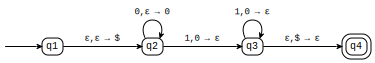

In [4]:
to_graph(m)

Now it's easier to see that it accepts strings of the form $\texttt{0}^n\texttt{1}^n$. If you draw the graph in a graph editor, use `->` for a right arrow.

## Running PDAs

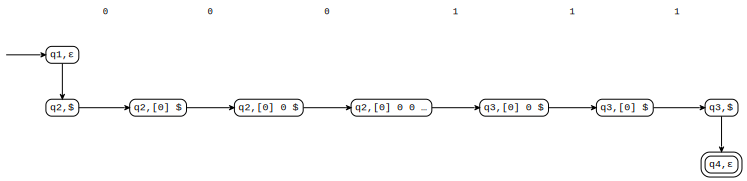

In [5]:
run(m, "0 0 0 1 1 1")

The nodes of the run now show the contents of the stack as well. The top symbol of the stack is marked with square brackets. If the stack gets too deep, then only the top few elements are shown, with an ellipsis instead of the rest of the stack. You can change how many stack elements are displayed using the `show_stack` option, which defaults to 3. (More about ellipses below.)

This is a deterministic PDA. That's not very exciting, so let's try a nondeterministic PDA. This one (Example 2.18) accepts strings of the form $\{ww^R\}$.

In [6]:
m = read_csv("examples/sipser-2-18.csv")
m.is_finite(), m.is_pushdown(), m.is_deterministic()

(False, True, False)

In [7]:
to_table(m)

,ε,,0,,1,
,ε,$,ε,0,ε,1
>@q1,"q2,$",,,,,
q2,"q3,ε",,"q2,0",,"q2,1",
q3,,"q4,ε",,"q3,ε",,"q3,ε"
@q4,,,,,,


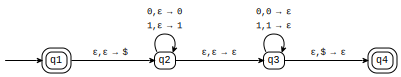

In [8]:
to_graph(m)

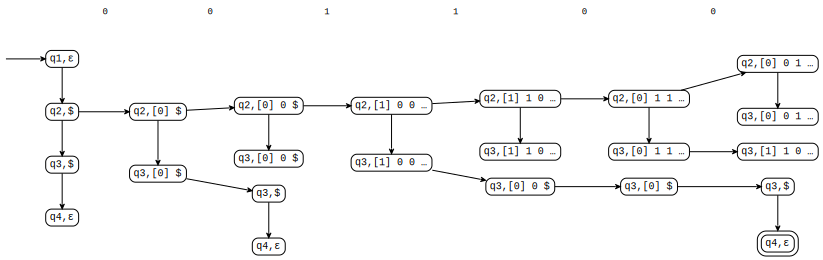

In [9]:
run(m, "0 0 1 1 0 0")

Notice the nondeterminism: at every step, the automaton considers whether it might be at the midpoint of the string.

We saw that in a nondeterministic FA, there could be infinitely many runs for an input string, and the run graph indicated this using a cycle. With nondeterministic PDAs, we have a new problem: they can push/pop as many times as they want without reading in any input, so the infinitely many runs also go through infinitely many configurations! Consider the following PDA, which (for some reason) pushes an arbitrary number of `#` signs, reads in a single `0`, then pops all the `#` signs again:

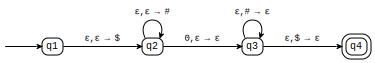

In [10]:
m = read_csv("examples/pdaloop.csv")
to_graph(m)

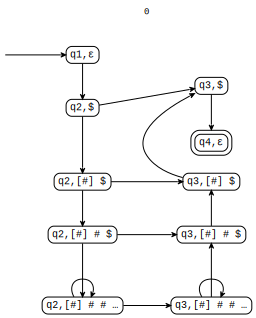

In [11]:
run(m, "0")

The graph shows us the first few pushes, but after the stack gets deep enough, only the top few items are shown, and the pushes stop creating new nodes. What isn't apparent from the run graph is that the simulator does make sure that the same number of `#` signs are pushed and popped.